<a href="https://colab.research.google.com/github/nol0n/ml_tasks/blob/master/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/Health Insurance Lead Prediction Raw Data.csv"
data = pd.read_csv(path, sep=',', header=0,  engine='python')
data = data.drop(columns=['ID', 'Region_Code'])
data

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


Дана информация о посетителях сайта страховой компании:
- идентификатор города проживания
- идентификатор района проживания
- персональная или совместное страхование
- максимальный и минимальный возраст людей, которые рассматривают данное предложение
- оценка здоровья
- на протяжении какого времени имели страховку до этого
- текущая категория страхования, если до этого оно было
- рекомендуемый категория страхования
- рекомендуемая цена
- подали заявку или нет

Необходимо определить подаст ли клиент заявку на основании имеющихся о нем данных.

In [ ]:
class_balance = data['Response'].value_counts(normalize=True)
class_balance

,proportion
Response,


In [ ]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent

,0
City_Code,0.000000
Accomodation_Type,0.000000
Reco_Insurance_Type,0.000000
Upper_Age,0.000000
Lower_Age,0.000000
Is_Spouse,0.000000
Health Indicator,22.976691
Holding_Policy_Duration,39.799929
Holding_Policy_Type,39.799929
Reco_Policy_Cat,0.000000


# Диаграмма рассеивания

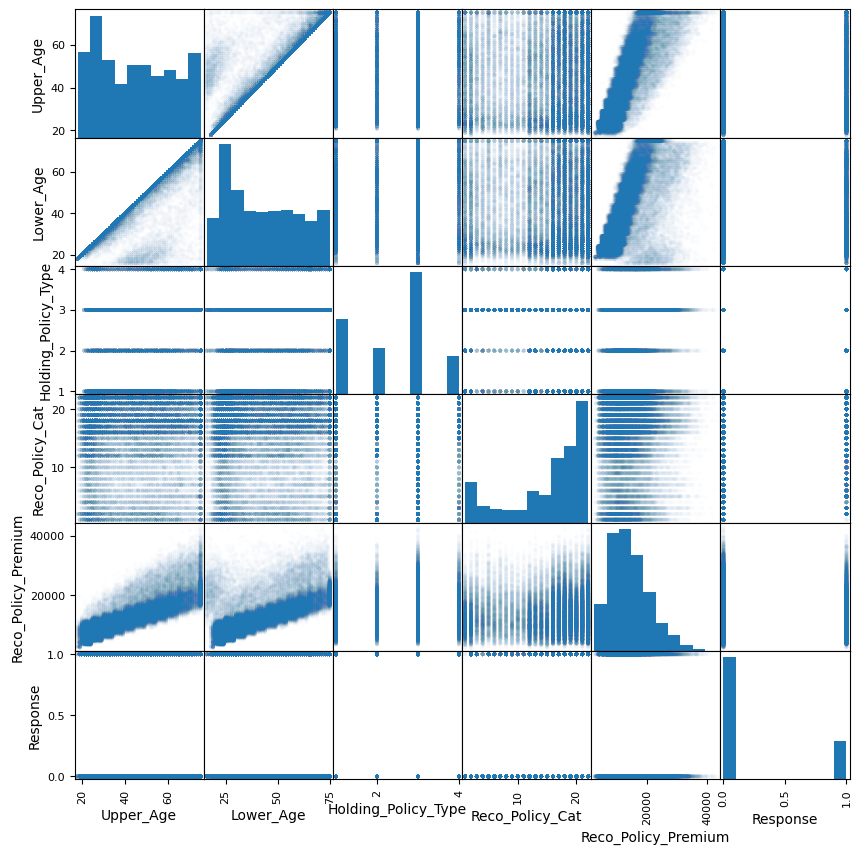

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(apply_data, alpha = 0.01, figsize = (10, 10))
pass

# Матрица корреляции

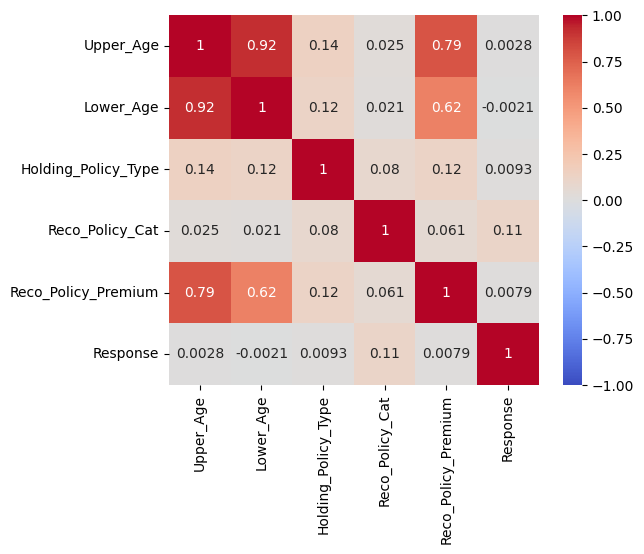

In [ ]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm', annot = True)
pass

In [ ]:
data['Upper_Age'].describe()

,Upper_Age
count,50882.000000
mean,44.856275
std,17.310271
min,18.000000
25%,28.000000
50%,44.000000
75%,59.000000
max,75.000000


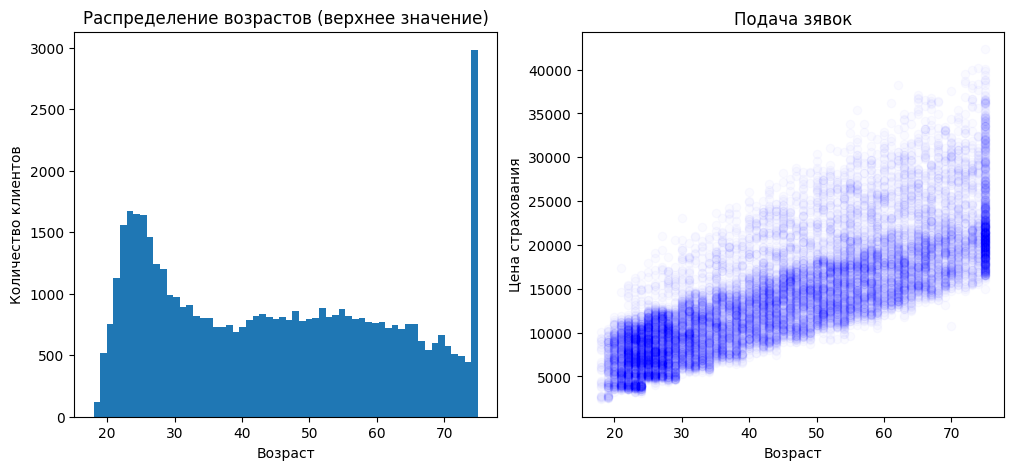

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(data['Upper_Age'], bins=58)
axes[0].set_title('Распределение возрастов (верхнее значение)')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество клиентов')

axes[1].scatter(apply_data['Upper_Age'],
            apply_data['Reco_Policy_Premium'],
            color='blue', label='positive', alpha=0.02)
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Цена страхования')

axes[1].set_title('Подача зявок')

plt.show()

In [ ]:
data['Lower_Age'].describe()

,Lower_Age
count,50882.000000
mean,42.738866
std,17.319375
min,16.000000
25%,27.000000
50%,40.000000
75%,57.000000
max,75.000000


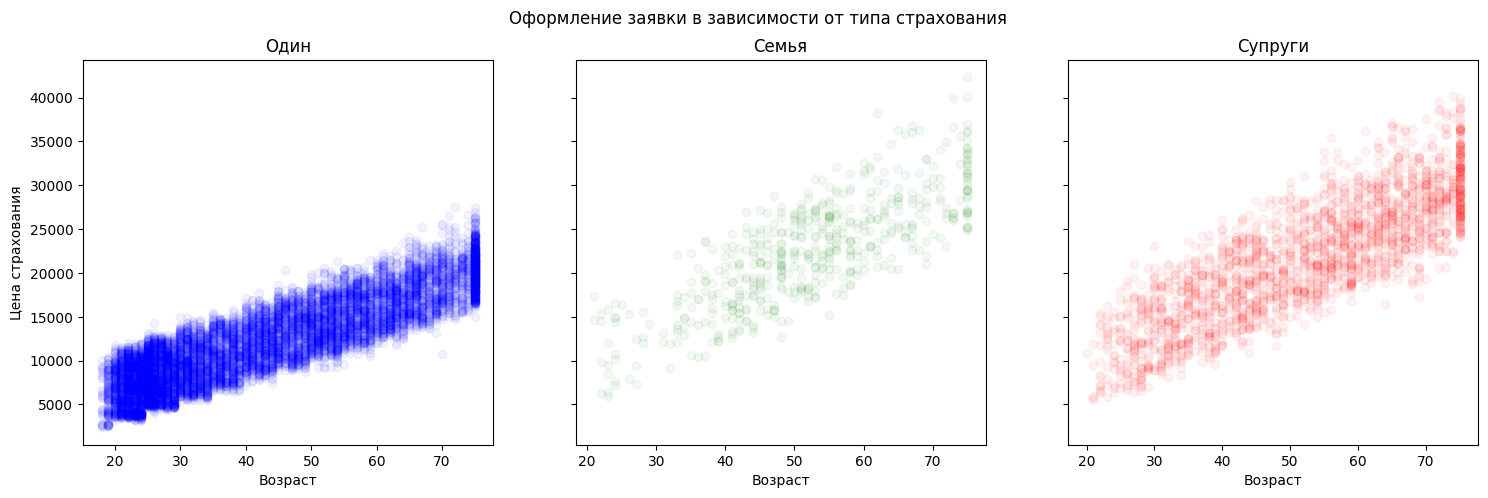

In [ ]:
individual = apply_data[(apply_data['Reco_Insurance_Type'] == 'Individual')]
family = apply_data[(apply_data['Reco_Insurance_Type'] == 'Joint') & (apply_data['Is_Spouse'] == 'No')]
spouse = apply_data[(apply_data['Reco_Insurance_Type'] == 'Joint') & (apply_data['Is_Spouse'] == 'Yes')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axes[0].scatter(individual['Upper_Age'], individual['Reco_Policy_Premium'], color='blue', alpha=0.05)
axes[0].set_title('Один')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Цена страхования')

axes[1].scatter(family['Upper_Age'], family['Reco_Policy_Premium'], color='green', alpha=0.05)
axes[1].set_title('Семья')
axes[1].set_xlabel('Возраст')

axes[2].scatter(spouse['Upper_Age'], spouse['Reco_Policy_Premium'], color='red', alpha=0.05)
axes[2].set_title('Супруги')
axes[2].set_xlabel('Возраст')

plt.suptitle('Оформление заявки в зависимости от типа страхования')
plt.show()

In [ ]:
data['City_Code'].describe()

,City_Code
count,50882
unique,36
top,C1
freq,8973


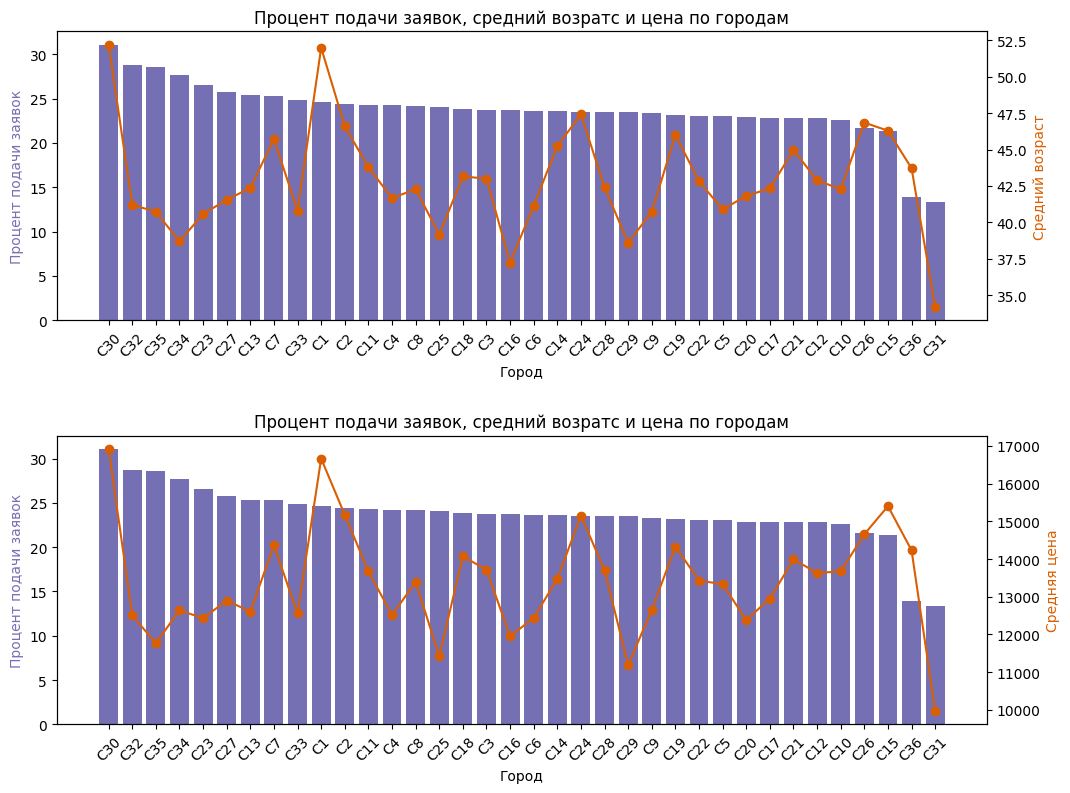

In [ ]:
total_by_city = data['City_Code'].value_counts()
apply_by_city = apply_data['City_Code'].value_counts()
city_analysis = pd.DataFrame({
    'total_clients': total_by_city,
    'positive_responses': apply_by_city
})
city_analysis['response_rate'] = (city_analysis['positive_responses'] / city_analysis['total_clients'] * 100).round(2)
city_analysis_sorted = city_analysis.sort_values('response_rate', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 9))

axes[0].bar(range(len(city_analysis_sorted)), city_analysis_sorted['response_rate'], color='#7570b3')
axes[0].set_xticks(range(len(city_analysis_sorted)), city_analysis_sorted.index, rotation=45)

axes[0].set_xlabel('Город')
axes[0].set_ylabel('Процент подачи заявок', color='#7570b3')
axes[0].set_title('Процент подачи заявок, средний возратс и цена по городам')

axes[1].bar(range(len(city_analysis_sorted)), city_analysis_sorted['response_rate'], color='#7570b3')
axes[1].set_xticks(range(len(city_analysis_sorted)), city_analysis_sorted.index, rotation=45)

axes[1].set_xlabel('Город')
axes[1].set_ylabel('Процент подачи заявок', color='#7570b3')
axes[1].set_title('Процент подачи заявок, средний возратс и цена по городам')

average_age_by_city = data.groupby('City_Code')['Upper_Age'].mean()

axes0_2 = axes[0].twinx()
axes0_2.plot(range(len(city_analysis_sorted)), average_age_by_city[city_analysis_sorted.index], color='#d95f02', marker='o')
axes0_2.set_ylabel('Средний возраст', color='#d95f02')
axes0_2.tick_params(axis='y')

average_price_by_city = data.groupby('City_Code')['Reco_Policy_Premium'].mean()

axes1_2 = axes[1].twinx()
axes1_2.plot(range(len(city_analysis_sorted)), average_price_by_city[city_analysis_sorted.index], color='#d95f02', marker='o')
axes1_2.set_ylabel('Средняя цена', color='#d95f02')
axes1_2.tick_params(axis='y')

plt.subplots_adjust(hspace=0.4)

plt.show()

# Подготока данных

In [ ]:
path = "/content/drive/MyDrive/Health Insurance Lead Prediction Raw Data.csv"
data = pd.read_csv(path, sep=',', header=0,  engine='python')
data = data.drop(columns=['ID', 'Region_Code'])
data

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']
['Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']


# Заполнение NaN

In [ ]:
for c in categorical_columns:
  print(c, data[c].unique())

for n in numerical_columns:
  print(n, data[n].isna().sum())

City_Code ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Accomodation_Type ['Rented' 'Owned']
Reco_Insurance_Type ['Individual' 'Joint']
Is_Spouse ['No' 'Yes']
Health Indicator ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Holding_Policy_Duration ['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
Upper_Age 0
Lower_Age 0
Holding_Policy_Type 20251
Reco_Policy_Cat 0
Reco_Policy_Premium 0
Response 0


In [ ]:
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].replace('14+', 15)
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].fillna(0)
data['Holding_Policy_Duration'] = pd.to_numeric(data['Holding_Policy_Duration'])

data['Holding_Policy_Type'] = data['Holding_Policy_Type'].fillna(0)
data['Holding_Policy_Type'] = data['Holding_Policy_Type'].astype('int')
data['Holding_Policy_Type'] = data['Holding_Policy_Type'].astype('str')

data['Health Indicator'] = data['Health Indicator'].fillna('XN')

data['Reco_Policy_Cat'] = data['Reco_Policy_Cat'].astype('str')

data['Response'] = data['Response'].astype('str')

In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Response']
['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Reco_Policy_Premium']


In [ ]:
for c in categorical_columns:
    print(c, data[c].unique())

for n in numerical_columns:
  print(n, data[n].isna().sum())

City_Code ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Accomodation_Type ['Rented' 'Owned']
Reco_Insurance_Type ['Individual' 'Joint']
Is_Spouse ['No' 'Yes']
Health Indicator ['X1' 'X2' 'XN' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Holding_Policy_Type ['3' '0' '1' '4' '2']
Reco_Policy_Cat ['22' '19' '16' '17' '1' '18' '21' '13' '20' '9' '2' '4' '12' '6' '14'
 '11' '3' '8' '7' '10' '15' '5']
Response ['0' '1']
Upper_Age 0
Lower_Age 0
Holding_Policy_Duration 0
Reco_Policy_Premium 0


# Векторизация

In [ ]:
data_desc = data.describe(include = [object])

In [ ]:
binary_columns    = [c for c in categorical_columns if data_desc[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_desc[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Response'] ['City_Code', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat']


In [ ]:
data['Is_Spouse'] = data['Is_Spouse'].map({'Yes': 1, 'No': 0})
data['Accomodation_Type'] = data['Accomodation_Type'].map({'Owned': 1, 'Rented': 0})
data['Reco_Insurance_Type'] = data['Reco_Insurance_Type'].map({'Joint': 1, 'Individual': 0})
data['Response'] = data['Response'].map({'1': 1, '0': 0})

# Объединение в одну таблицу

In [ ]:
data_binary = data[binary_columns]
data[binary_columns].describe()

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Response
count,50882.000000,50882.000000,50882.000000,50882.000000
mean,0.549330,0.203333,0.165520,0.239947
std,0.497566,0.402482,0.371653,0.427055
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['City_Code_C1', 'City_Code_C10', 'City_Code_C11', 'City_Code_C12',
       'City_Code_C13', 'City_Code_C14', 'City_Code_C15', 'City_Code_C16',
       'City_Code_C17', 'City_Code_C18', 'City_Code_C19', 'City_Code_C2',
       'City_Code_C20', 'City_Code_C21', 'City_Code_C22', 'City_Code_C23',
       'City_Code_C24', 'City_Code_C25', 'City_Code_C26', 'City_Code_C27',
       'City_Code_C28', 'City_Code_C29', 'City_Code_C3', 'City_Code_C30',
       'City_Code_C31', 'City_Code_C32', 'City_Code_C33', 'City_Code_C34',
       'City_Code_C35', 'City_Code_C36', 'City_Code_C4', 'City_Code_C5',
       'City_Code_C6', 'City_Code_C7', 'City_Code_C8', 'City_Code_C9',
       'Health Indicator_X1', 'Health Indicator_X2', 'Health Indicator_X3',
       'Health Indicator_X4', 'Health Indicator_X5', 'Health Indicator_X6',
       'Health Indicator_X7', 'Health Indicator_X8', 'Health Indicator_X9',
       'Health Indicator_XN', 'Holding_Policy_Type_0', 'Holding_Policy_Type_1',
       'Holding_Policy_Typ

In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium
count,5.088200e+04,5.088200e+04,5.088200e+04,5.088200e+04
mean,-1.396452e-19,1.284736e-17,3.323556e-17,-1.396452e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.551465e+00,-1.543870e+00,-7.776622e-01,-1.806345e+00
25%,-9.737730e-01,-9.087433e-01,-7.776622e-01,-7.489976e-01
50%,-4.946631e-02,-1.581389e-01,-3.580278e-01,-1.526462e-01
75%,8.170712e-01,8.234208e-01,4.812411e-01,5.936275e-01
max,1.741378e+00,1.862719e+00,2.369596e+00,4.425815e+00


In [ ]:
pp_data = pd.concat((data_numerical, data_nonbinary, data_binary), axis = 1)
pp_data

,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,...,Reco_Policy_Cat_4,Reco_Policy_Cat_5,Reco_Policy_Cat_6,Reco_Policy_Cat_7,Reco_Policy_Cat_8,Reco_Policy_Cat_9,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Response
0,-0.511620,-0.389094,2.369596,-0.387848,False,False,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
1,1.741378,-1.197437,-0.777662,2.477369,False,False,False,False,False,False,...,False,False,False,False,False,False,1,1,0,0
2,-0.742696,-0.620049,-0.567845,-1.021832,False,False,False,False,False,False,...,False,False,False,False,False,False,1,0,0,1
3,0.412687,0.303772,2.369596,0.545677,False,False,False,False,False,False,...,False,False,False,False,False,False,1,1,0,0
4,-0.049466,0.072816,-0.148211,-0.573582,False,False,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,-1.320388,-1.197437,-0.777662,-0.983289,False,False,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
50878,-1.031542,-0.908743,0.691058,-1.331692,False,False,False,False,False,False,...,True,False,False,False,False,False,0,0,0,0
50879,1.048148,1.169854,2.369596,-0.426391,True,False,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
50880,1.510301,0.361510,-0.358028,2.123686,True,False,False,False,False,False,...,False,False,False,False,False,False,1,1,0,1


# X и y

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = pp_data.drop('Response', axis = 1)
y = pp_data['Response']
feature_names = X.columns

In [ ]:
X = X.to_numpy()
y = np.array(y)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

40705 10177


# kNN

In [342]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

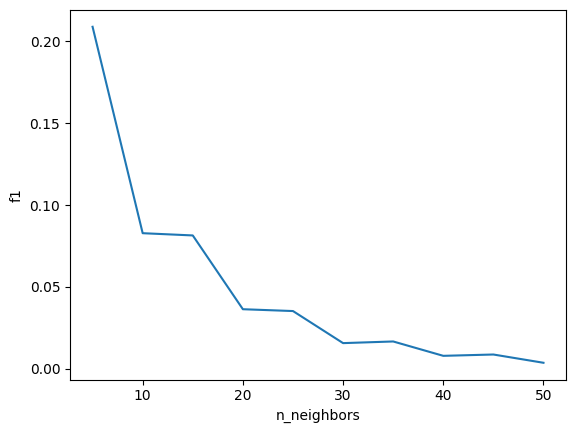

In [347]:
n_range = range(5, 51, 5)
scores = []

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
    scores.append(cv_scores.mean())

results = pd.DataFrame({
    'n_neighbors': n_range,
    'f1': scores
})

sns.lineplot(data=results, x='n_neighbors', y='f1')
pass

In [344]:
best_n = results.loc[results['accuracy'].idxmax(), 'n_neighbors']

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
print(err_test, best_n)

0.23975631325537977

In [345]:
print(confusion_matrix(y_test, y_test_predict))

[[7725   10]
 [2430   12]]
